In [4]:
%matplotlib inline

#system
import os
import glob

#math
import numpy as np

#video and image
import cv2

#display
import matplotlib.pyplot as plt
import matplotlib.image as mplimg


In [5]:
def convert_to_binary(img, 
                      s_thresh=(150, 255), 
                      h_thresh=(20, 40),
                      sx_thresh=(30, 100)):
    img = np.copy(img)
    
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    h_binary = np.zeros_like(h_channel)
    h_binary[(h_channel >= h_thresh[0]) & (h_channel <= h_thresh[1])] = 1
    
#     # Stack each channel
#     color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    
    combined_binary = np.zeros_like(s_binary)
    combined_binary[(h_binary == 1) | (s_binary == 1) | (sxbinary == 1)] = 1
    
    return h_binary, s_binary, combined_binary

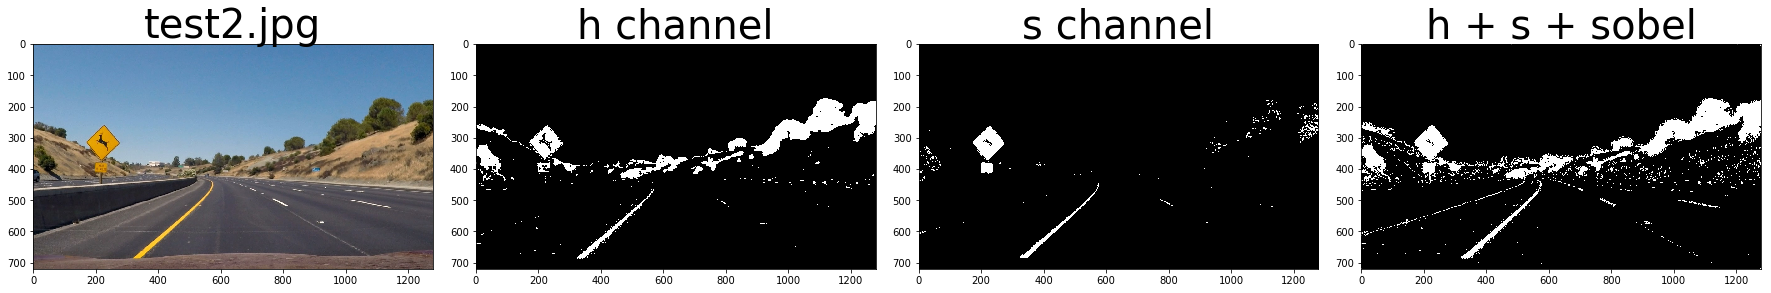

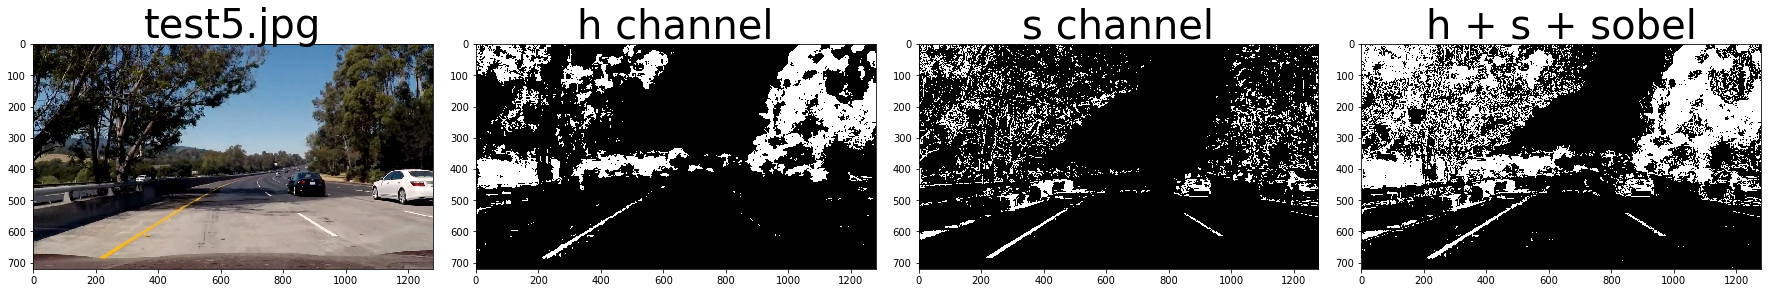

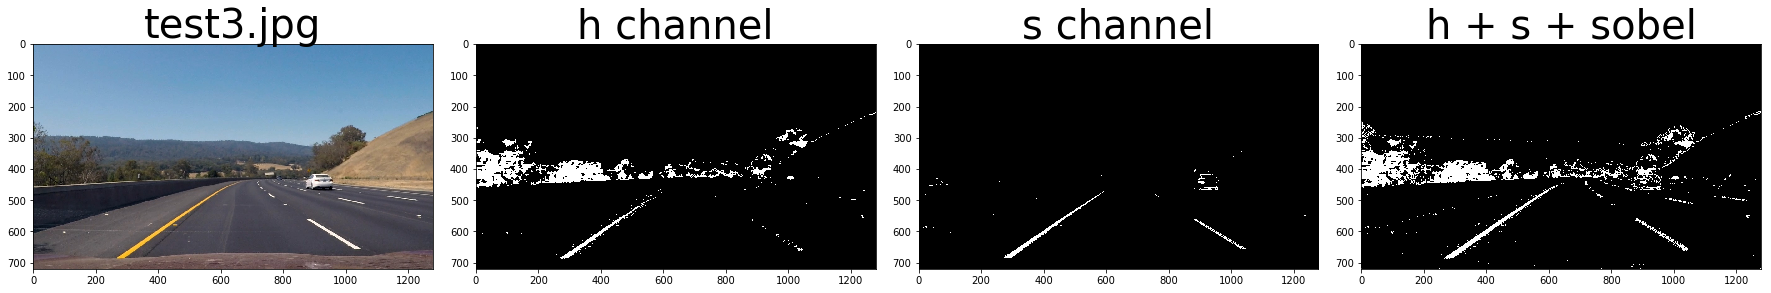

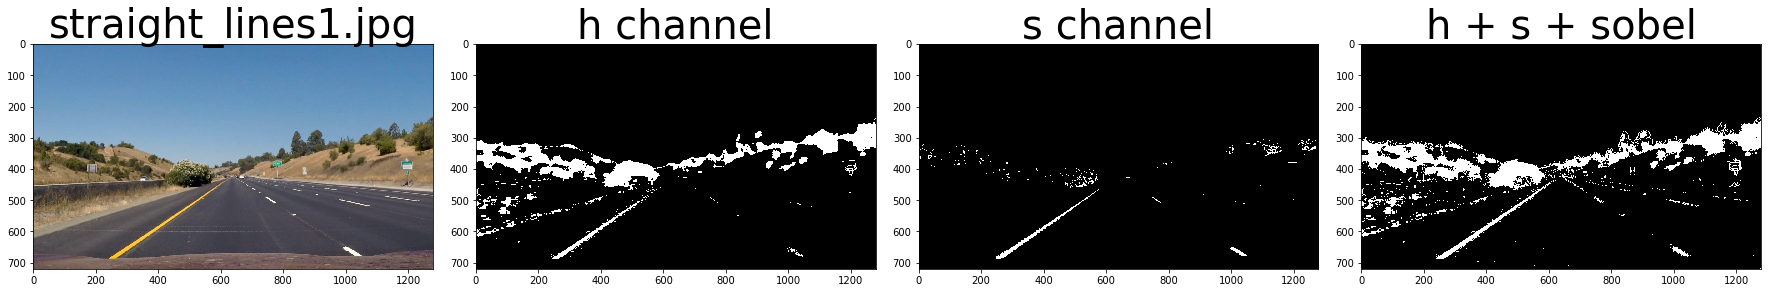

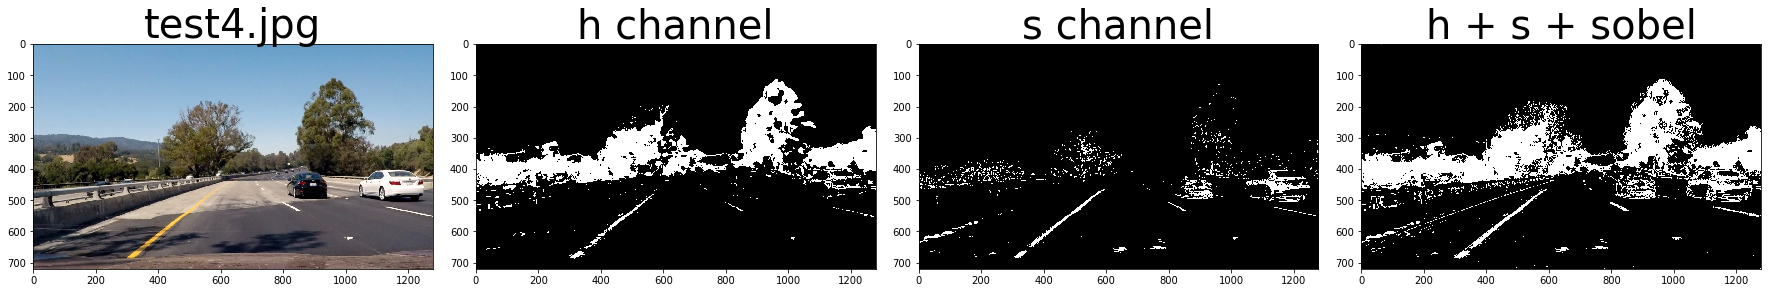

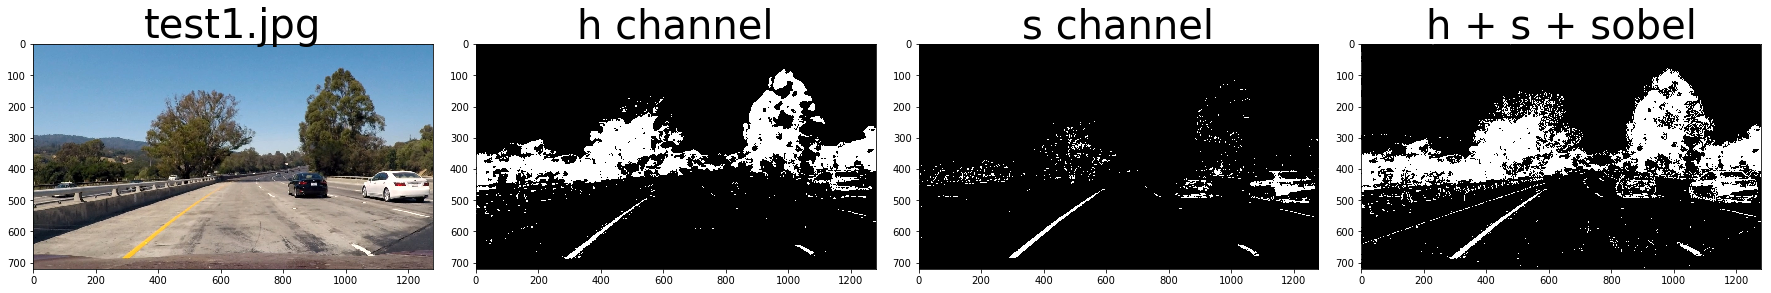

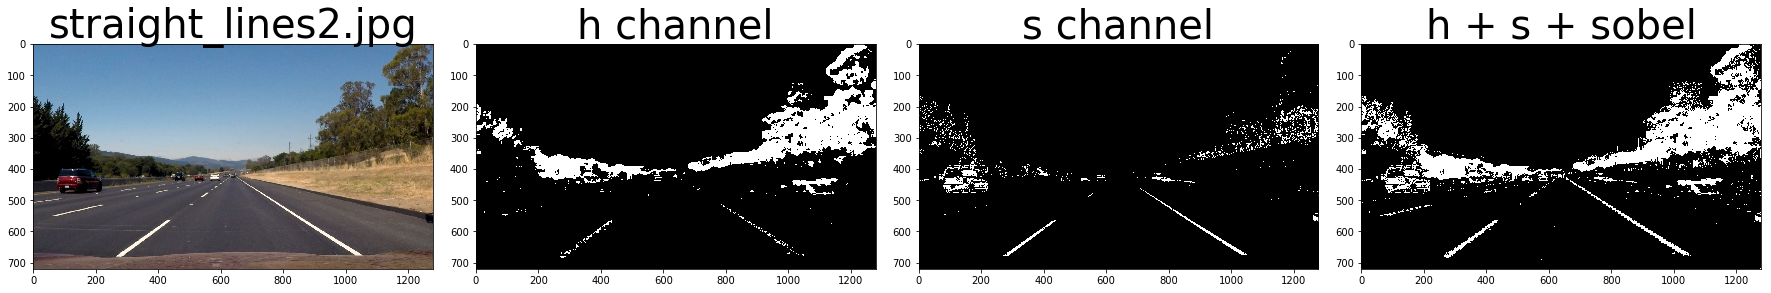

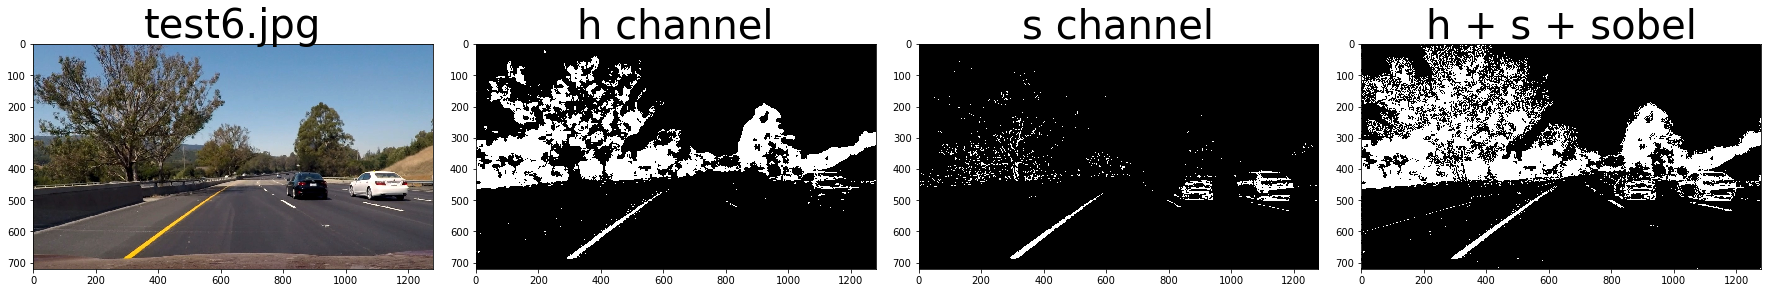

In [7]:
for fname in os.listdir('test_images/'):
    #PIPELINE
    image = mplimg.imread('test_images/' + fname)
    binary, b2, b3 = convert_to_binary(image)

    # Plot the result
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(image)
    ax1.set_title(fname, fontsize=40)
    ax2.imshow(binary, cmap='gray')
    ax2.set_title('h channel', fontsize=40)
    ax3.imshow(b2, cmap='gray')
    ax3.set_title('s channel', fontsize=40)
    ax4.imshow(b3, cmap='gray')
    ax4.set_title('h + s + sobel', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
